__Due Date:__ 2022-10-16 at 8:30 AM PT

---


__Name:__ \<your name here\>



For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

## Preparation

1. Create a 'data' folder in the root directory of your repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
    - NRI data: Download the "All Counties - County-level detail (Table)" CSV file from [here](https://hazards.fema.gov/nri/data-resources#csvDownload).
    - SVI data: Download the 2022 county-level dataset (CSV format) from [here](https://www.atsdr.cdc.gov/place-health/php/svi/svi-data-documentation-download.html).
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [1]:
import pandas as pd

nri_path = "data/raw/NRI_Table_Counties.csv"
svi_path = "data/raw/SVI_2022_US_county.csv"

nri = pd.read_csv(nri_path, dtype={"STCOFIPS": str})
svi = pd.read_csv(svi_path, dtype={"FIPS": str})




__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [2]:
afreq_cols = [col for col in nri.columns if col.endswith('_AFREQ')]
riskr_cols = [col for col in nri.columns if col.endswith('_RISKR')]

nri_subset = nri[['STCOFIPS'] + afreq_cols + riskr_cols]
nri_subset.head()

,STCOFIPS,AVLN_AFREQ,CFLD_AFREQ,CWAV_AFREQ,DRGT_AFREQ,ERQK_AFREQ,HAIL_AFREQ,HWAV_AFREQ,HRCN_AFREQ,ISTM_AFREQ,...,ISTM_RISKR,LNDS_RISKR,LTNG_RISKR,RFLD_RISKR,SWND_RISKR,TRND_RISKR,TSUN_RISKR,VLCN_RISKR,WFIR_RISKR,WNTW_RISKR
0,01001,NaN,NaN,0.0,25.969774,0.000431,2.806764,0.371517,0.080450,0.402025,...,Very Low,Relatively Low,Relatively Low,Relatively Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
1,01003,NaN,3.684142,0.0,12.353442,0.000338,1.529256,0.939761,0.248233,0.191996,...,Relatively Low,Relatively Low,Very High,Relatively Moderate,Relatively Low,Relatively Moderate,Insufficient Data,Not Applicable,Relatively Moderate,Relatively Low
2,01005,NaN,NaN,0.0,43.956953,0.000227,1.908785,0.371517,0.116398,0.393288,...,Very Low,Relatively Low,Relatively Moderate,Very Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
3,01007,NaN,NaN,0.0,28.894501,0.000790,3.447868,0.371517,0.066724,0.413094,...,Relatively Low,Relatively Low,Relatively Low,Very Low,Relatively Low,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low
4,01009,NaN,NaN,0.0,28.152598,0.000817,5.101344,0.371517,0.039238,0.509665,...,Relatively Moderate,Relatively Low,Relatively Moderate,Very Low,Relatively Moderate,Relatively Moderate,Not Applicable,Not Applicable,Very Low,Very Low


__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [3]:
missing_values = nri_subset.isnull().sum()
missing_values

STCOFIPS         0
AVLN_AFREQ    3023
CFLD_AFREQ    2646
CWAV_AFREQ       0
DRGT_AFREQ       7
ERQK_AFREQ       0
HAIL_AFREQ       7
HWAV_AFREQ       0
HRCN_AFREQ     918
ISTM_AFREQ     229
LNDS_AFREQ      40
LTNG_AFREQ     123
RFLD_AFREQ       0
SWND_AFREQ       7
TRND_AFREQ       7
TSUN_AFREQ    3103
VLCN_AFREQ    3125
WFIR_AFREQ      88
WNTW_AFREQ       0
AVLN_RISKR       0
CFLD_RISKR       0
CWAV_RISKR       0
DRGT_RISKR       0
ERQK_RISKR       0
HAIL_RISKR       0
HWAV_RISKR       0
HRCN_RISKR       0
ISTM_RISKR       0
LNDS_RISKR       0
LTNG_RISKR       0
RFLD_RISKR       0
SWND_RISKR       0
TRND_RISKR       0
TSUN_RISKR       0
VLCN_RISKR       0
WFIR_RISKR       0
WNTW_RISKR       0
dtype: int64

__4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [4]:
nri_subset['AVLN_AFREQ_missing'] = nri_subset['AVLN_AFREQ'].isnull()
crosstab = pd.crosstab(nri_subset['AVLN_AFREQ_missing'], nri_subset['AVLN_RISKR'], dropna=False)
crosstab

/var/folders/jr/00w_2h1n2mq3z087gm43fv947003j8/T/ipykernel_87338/3824752843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nri_subset['AVLN_AFREQ_missing'] = nri_subset['AVLN_AFREQ'].isnull()


AVLN_RISKR,Not Applicable,Relatively High,Relatively Low,Relatively Moderate,Very High,Very Low
AVLN_AFREQ_missing,,,,,,
False,0,15,52,33,9,99
True,3023,0,0,0,0,0


__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [5]:
hazards = [col.split('_')[0] for col in afreq_cols]

for hazard in hazards:
    afreq_col = f"{hazard}_AFREQ"
    riskr_col = f"{hazard}_RISKR"

    na_rows = nri_subset[riskr_col] == 'Not Applicable'

    nri_subset.loc[na_rows, afreq_col] = nri_subset.loc[na_rows, afreq_col].fillna(0)

## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__
__1. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`


In [6]:
svi_columns = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
    'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR',
    'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY',
    'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT',
    'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE'
]

svi_subset = svi[svi_columns]

__2. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__

In [7]:
svi_missing_values = svi_subset.isnull().sum()
svi_missing_values

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
EP_POV150       0
EP_UNEMP        0
EP_HBURD        0
EP_NOHSDP       0
EP_UNINSUR      0
EP_AGE65        0
EP_AGE17        0
EP_DISABL       0
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       0
EP_CROWD        0
EP_NOVEH        0
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         0
EP_HISP         0
EP_ASIAN        0
EP_AIAN         0
EP_NHPI         0
EP_TWOMORE      0
EP_OTHERRACE    0
dtype: int64

## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [8]:
nri_fips = set(nri_subset['STCOFIPS'])
svi_fips = set(svi_subset['FIPS'])

nri_not_in_svi = nri_fips - svi_fips
svi_not_in_nri = svi_fips - nri_fips

print(f"FIPS in NRI but not in SVI: {nri_not_in_svi}")
print("\n")
print(f"FIPS in SVI but not in NRI: {svi_not_in_nri}")

FIPS in NRI but not in SVI: {'72005', '69120', '09007', '72125', '60050', '72019', '72093', '72075', '72031', '09001', '72073', '09011', '72081', '72001', '72055', '72149', '72013', '09009', '72119', '72053', '72127', '72071', '72017', '72107', '72147', '72079', '72065', '72011', '72009', '72033', '72057', '72021', '72003', '72023', '72139', '72151', '60020', '72015', '72113', '72067', '72069', '72099', '72089', '72097', '09005', '72131', '72083', '72091', '72129', '72061', '78030', '66010', '72047', '72027', '72007', '72115', '69110', '72111', '72045', '72145', '72087', '72109', '72095', '60010', '72041', '72035', '78010', '09013', '72105', '72103', '72085', '72133', '72117', '72141', '72051', '72143', '72135', '72039', '72054', '72137', '72063', '72043', '69100', '09003', '72037', '09015', '72121', '72029', '72059', '72123', '78020', '72049', '72077', '72025', '72153', '72101'}


FIPS in SVI but not in NRI: {'09150', '09180', '09110', '09160', '09120', '09190', '09130', '09140', '091

__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [9]:
merged_data = pd.merge(nri_subset, svi_subset, left_on='STCOFIPS', right_on='FIPS', how='outer')
merged_data

,STCOFIPS,AVLN_AFREQ,CFLD_AFREQ,CWAV_AFREQ,DRGT_AFREQ,ERQK_AFREQ,HAIL_AFREQ,HWAV_AFREQ,HRCN_AFREQ,ISTM_AFREQ,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
0,01001,0.0,0.000000,0.0,25.969774,0.000431,2.806764,0.371517,0.080450,0.402025,...,4.0,0.9,10.9,19.6,3.2,1.1,0.1,0.0,3.3,0.2
1,01003,0.0,3.684142,0.0,12.353442,0.000338,1.529256,0.939761,0.248233,0.191996,...,2.3,1.5,10.9,8.3,4.8,0.9,0.2,0.0,3.1,0.4
2,01005,0.0,0.000000,0.0,43.956953,0.000227,1.908785,0.371517,0.116398,0.393288,...,11.7,12.0,31.8,46.9,4.8,0.5,0.3,0.0,1.8,1.2
3,01007,0.0,0.000000,0.0,28.894501,0.000790,3.447868,0.371517,0.066724,0.413094,...,7.5,6.4,20.2,20.7,2.9,0.3,0.1,0.0,1.7,0.1
4,01009,0.0,0.000000,0.0,28.152598,0.000817,5.101344,0.371517,0.039238,0.509665,...,4.8,1.0,16.9,1.2,9.7,0.2,0.1,0.2,2.8,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,72151,0.0,0.212000,0.0,1.791557,0.007808,0.029748,0.000000,0.227714,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,72153,0.0,0.010000,0.0,0.000000,0.007230,0.029748,0.000000,0.183175,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,78010,0.0,0.252000,0.0,0.000000,0.008000,0.001990,0.000000,0.274961,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,78020,0.0,0.210000,0.0,0.000000,0.008000,0.002725,0.000000,0.386014,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [10]:
merged_missing_values = merged_data.isnull().sum()
merged_missing_values

STCOFIPS         9
AVLN_AFREQ       9
CFLD_AFREQ       9
CWAV_AFREQ       9
DRGT_AFREQ      16
                ..
EP_ASIAN        96
EP_AIAN         96
EP_NHPI         96
EP_TWOMORE      96
EP_OTHERRACE    96
Length: 71, dtype: int64

## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

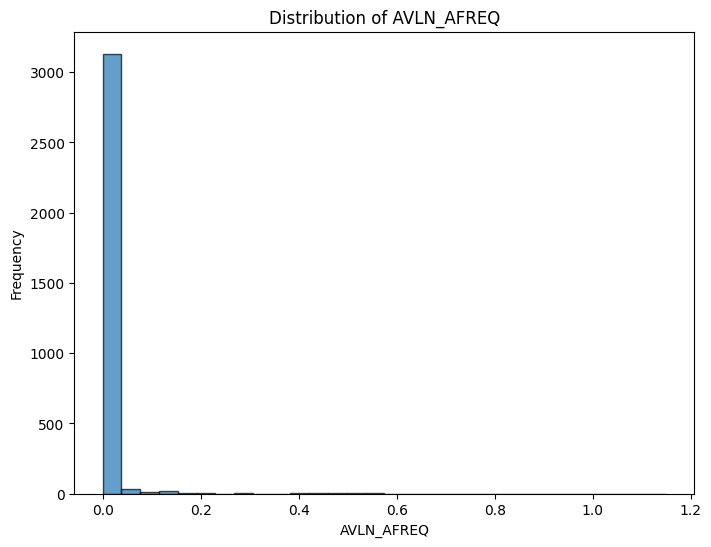

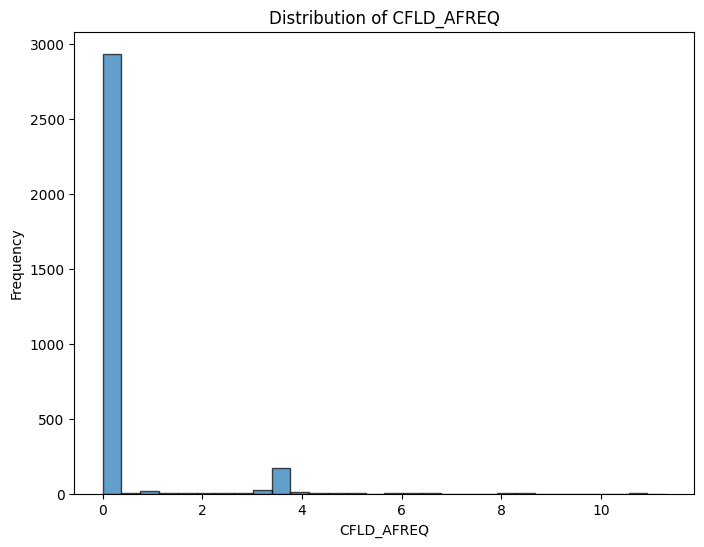

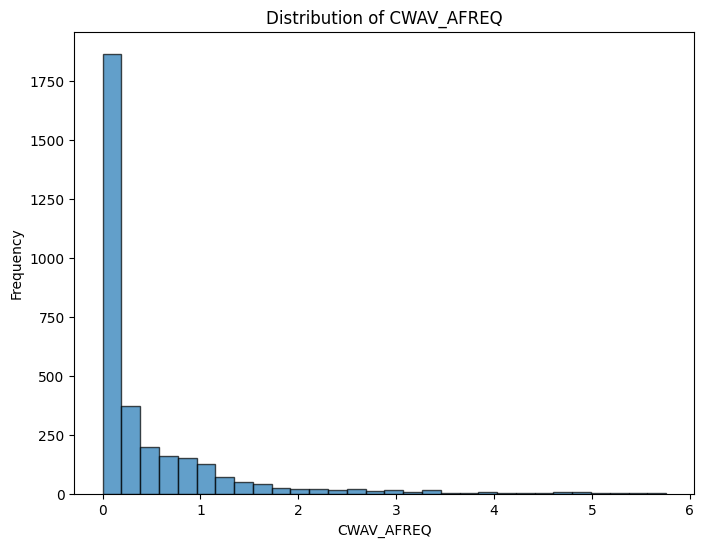

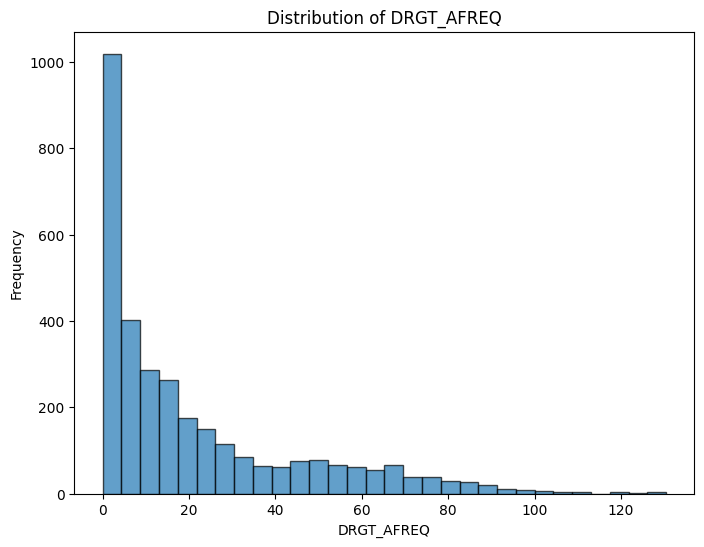

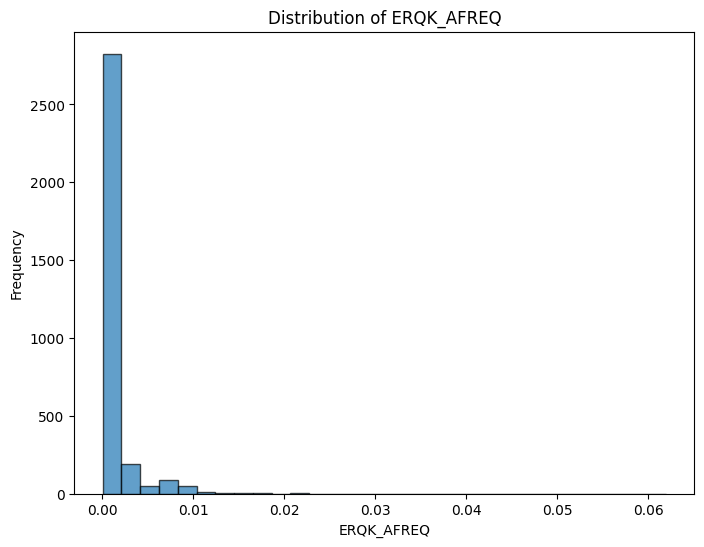

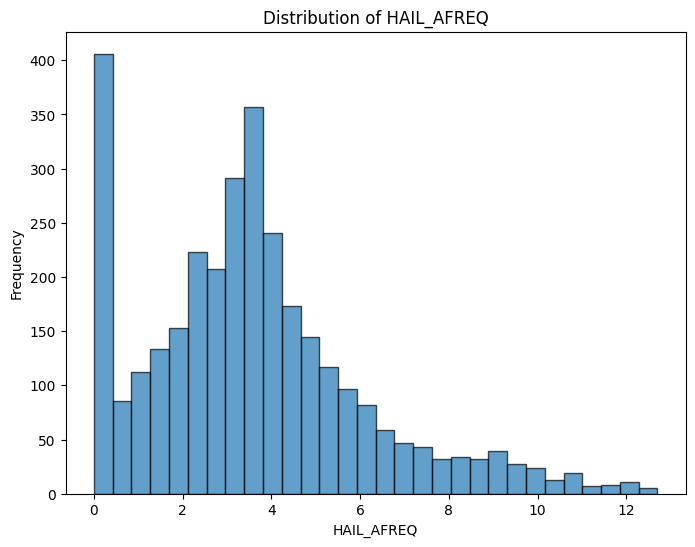

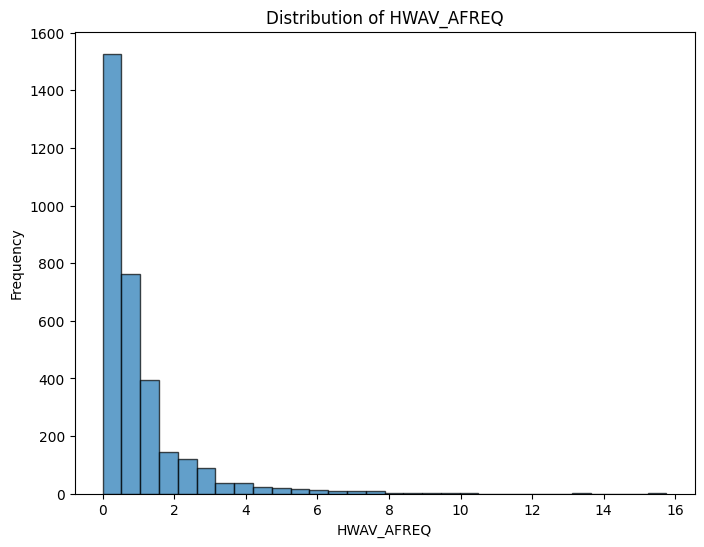

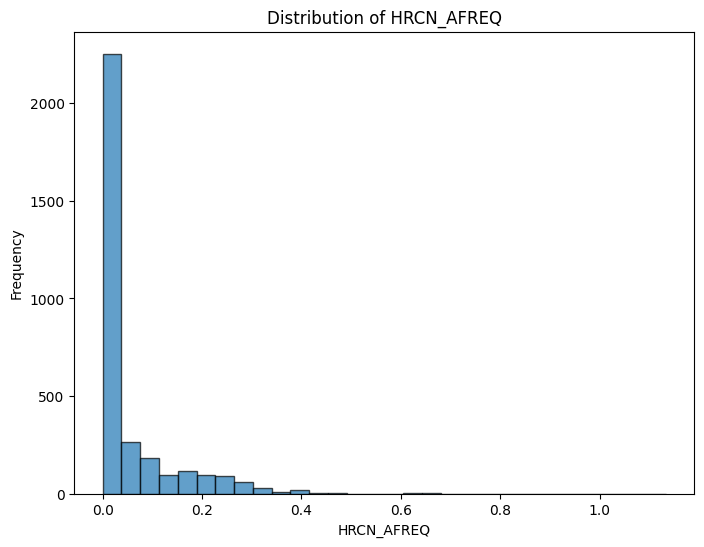

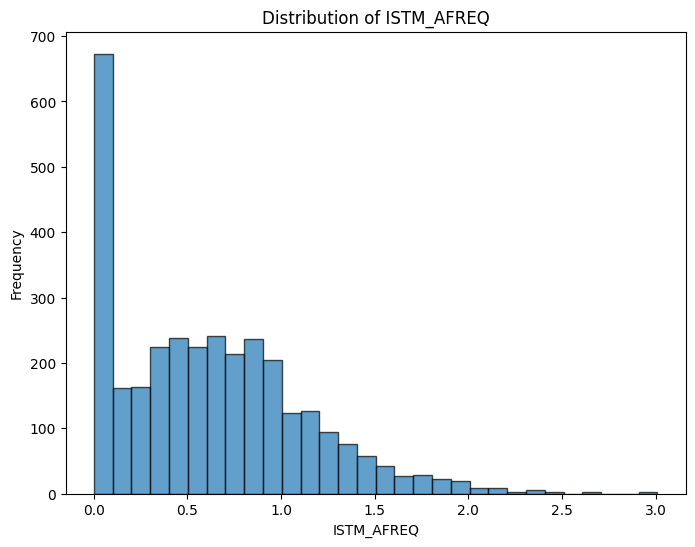

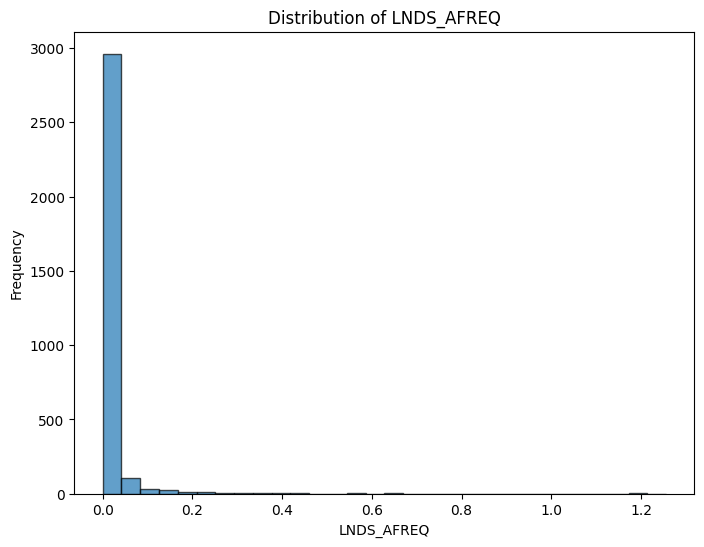

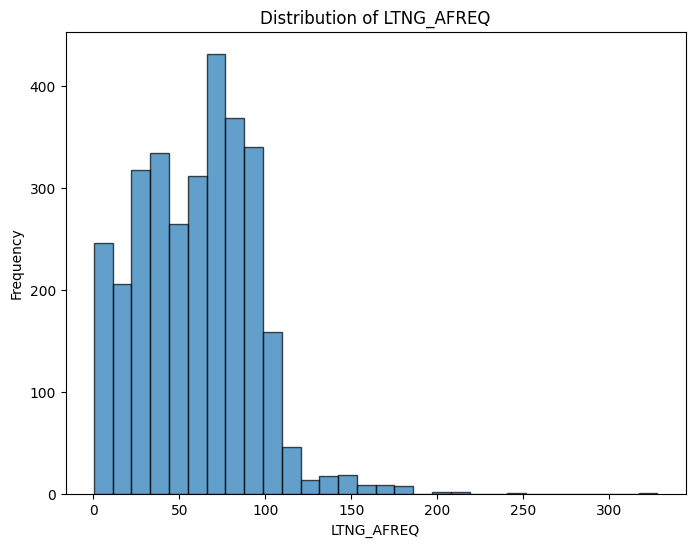

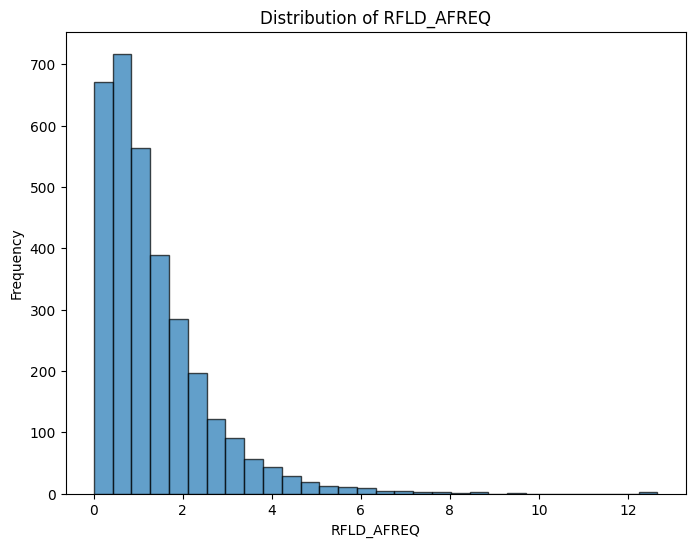

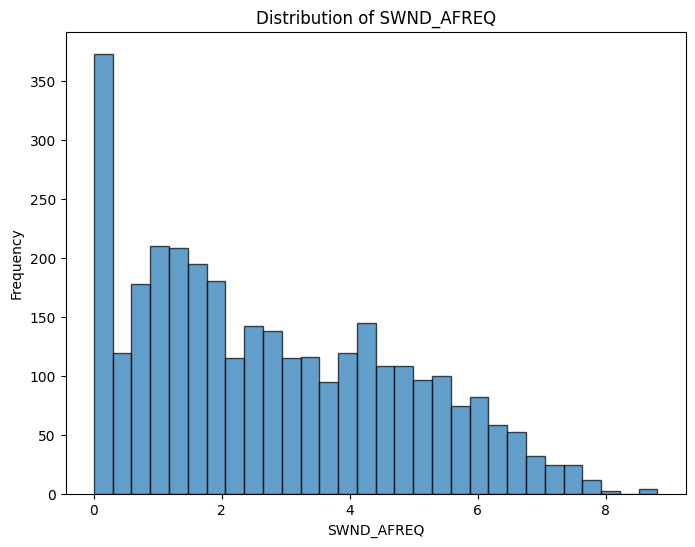

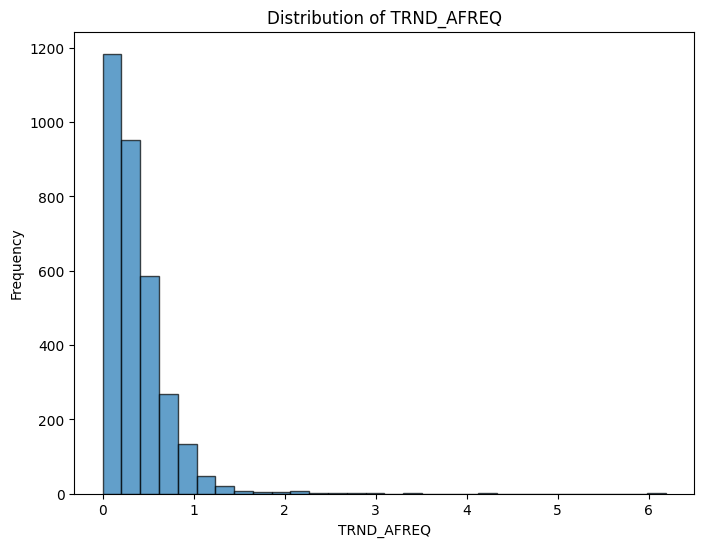

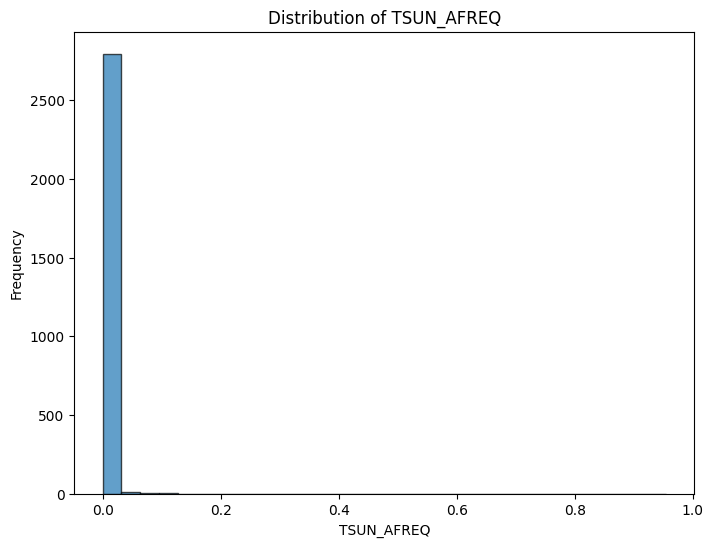

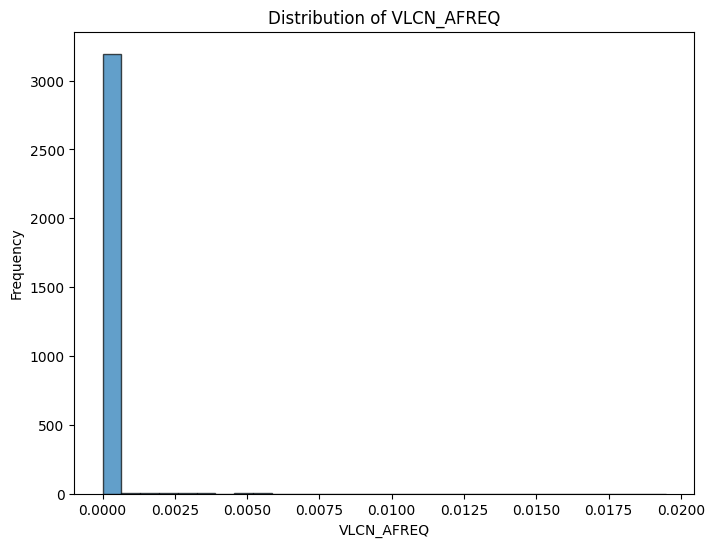

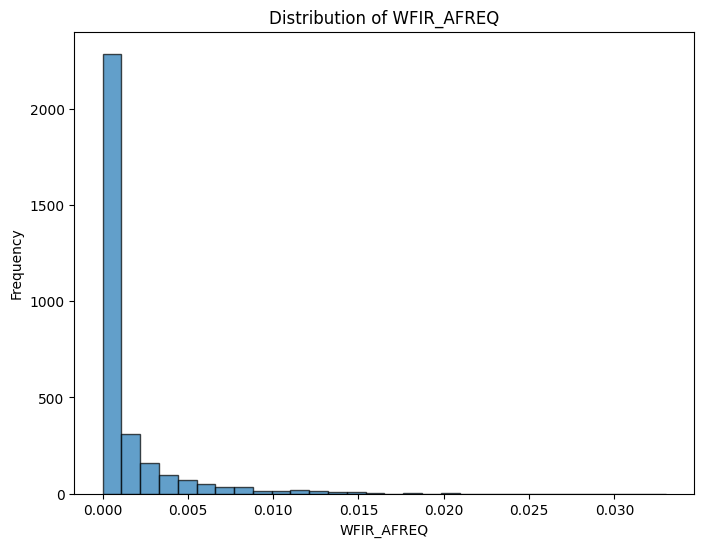

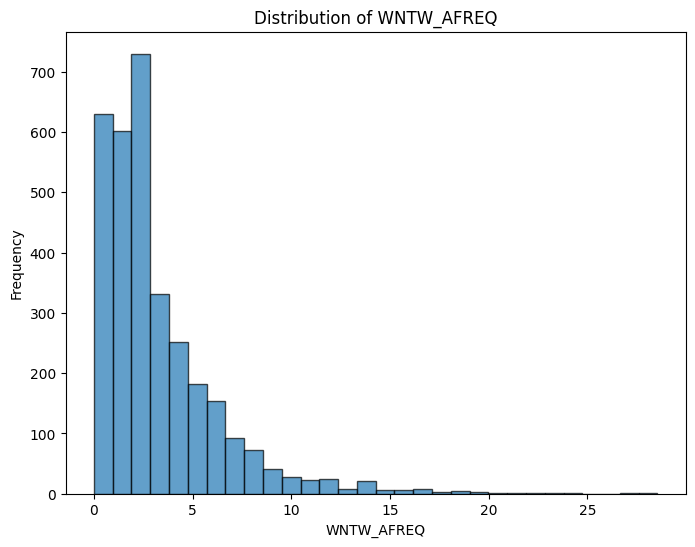

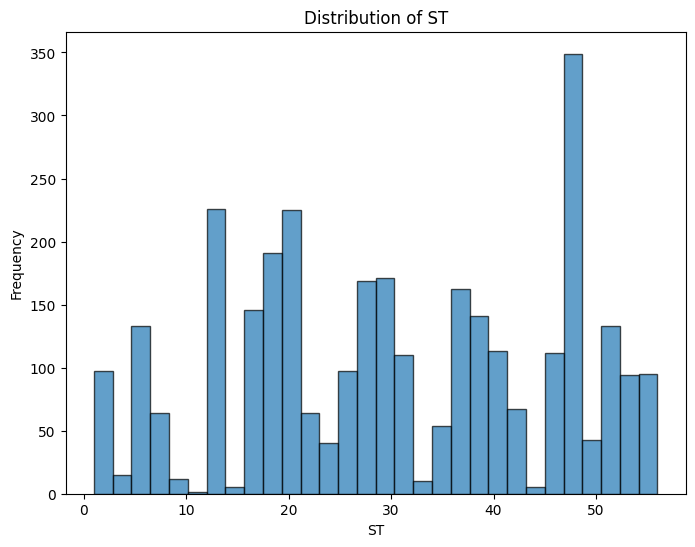

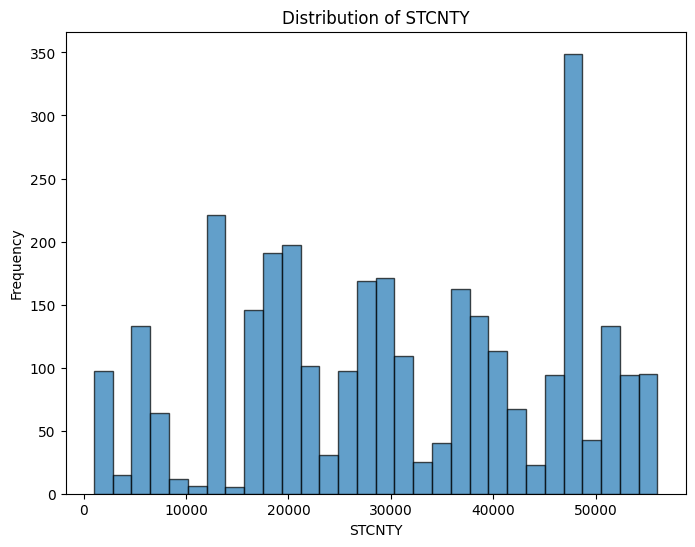

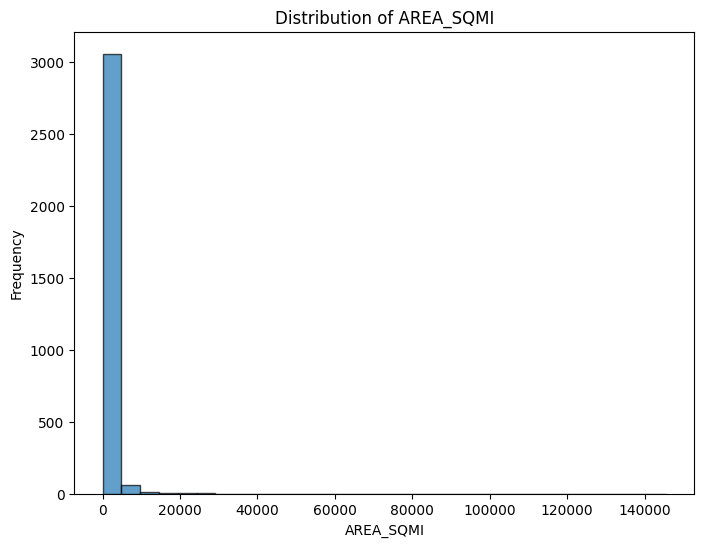

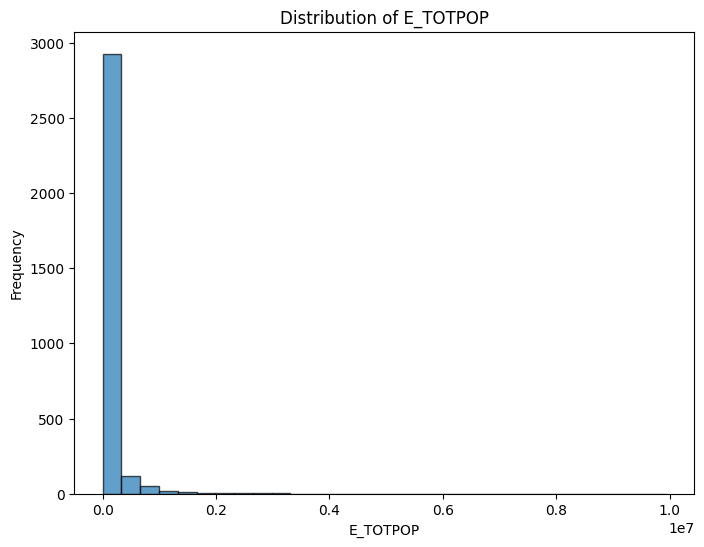

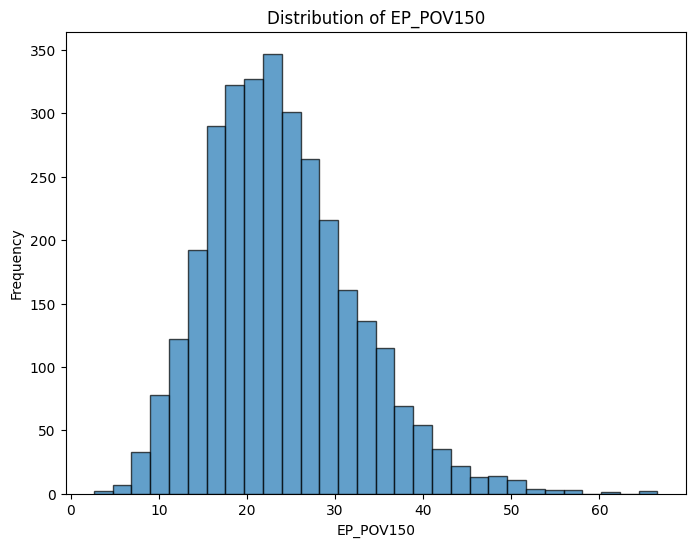

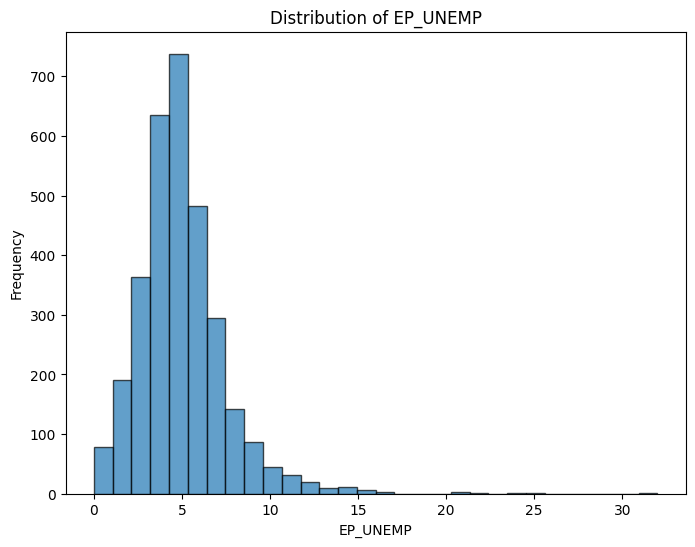

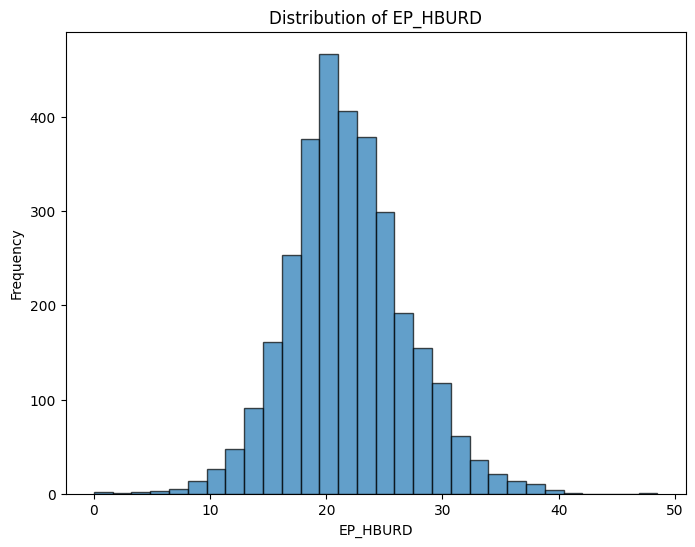

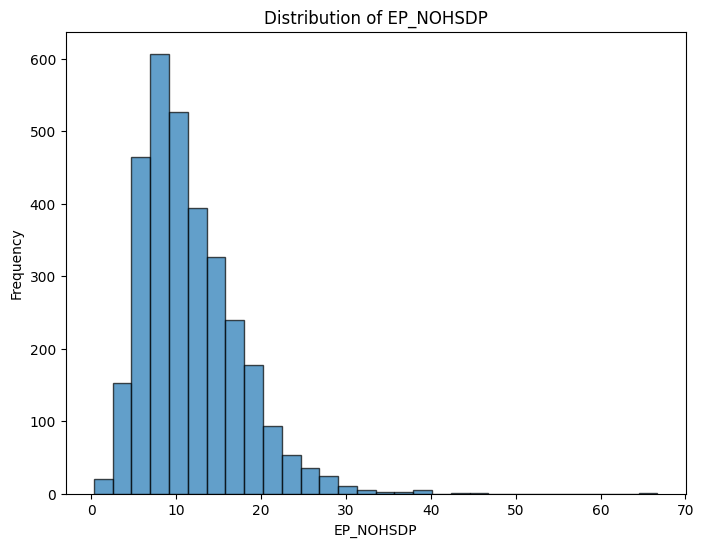

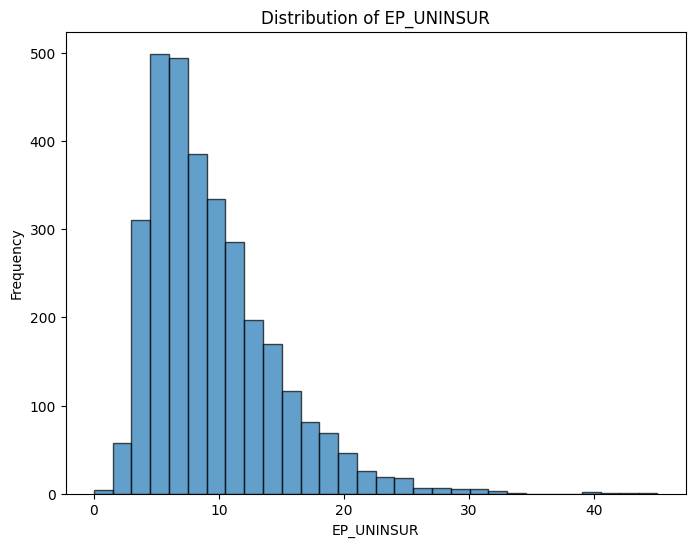

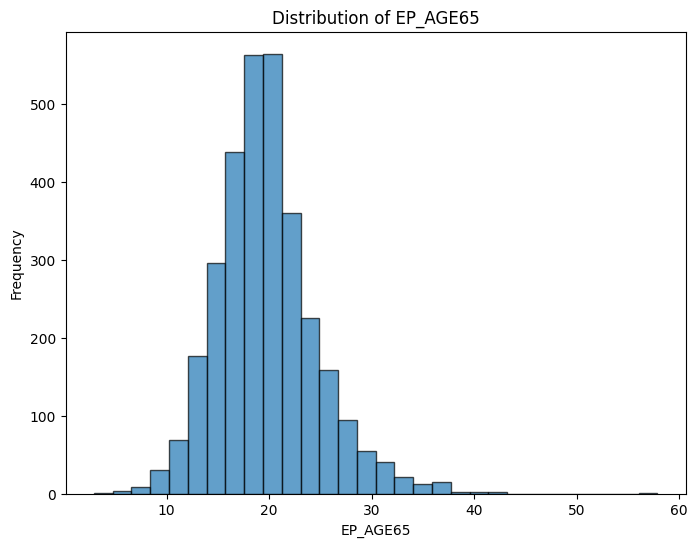

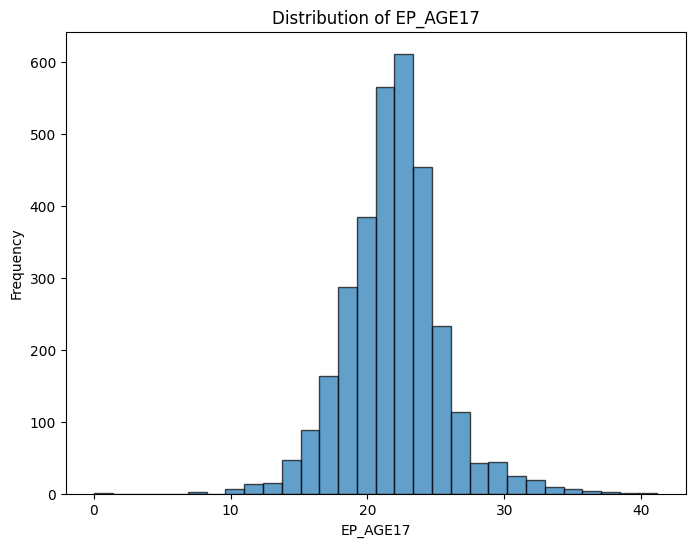

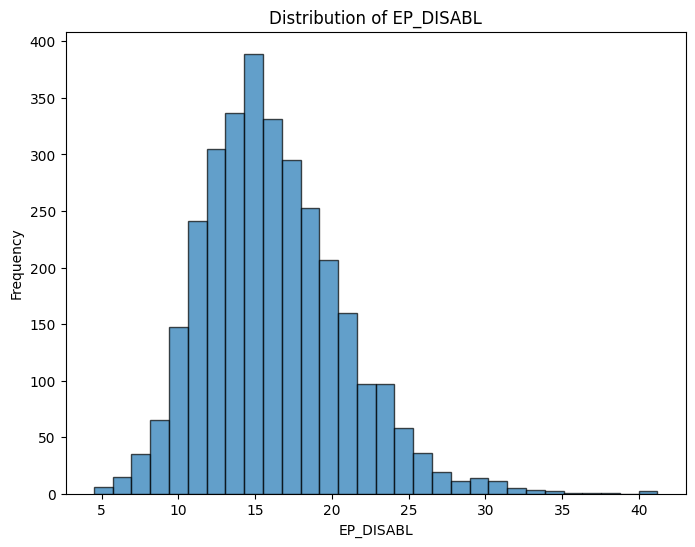

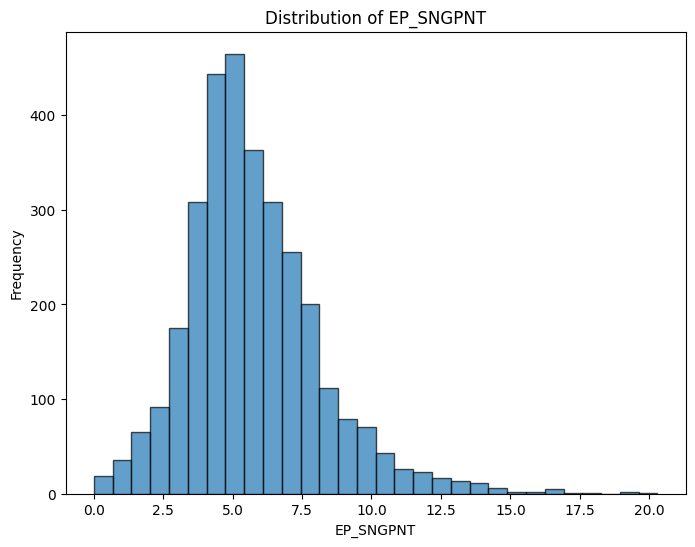

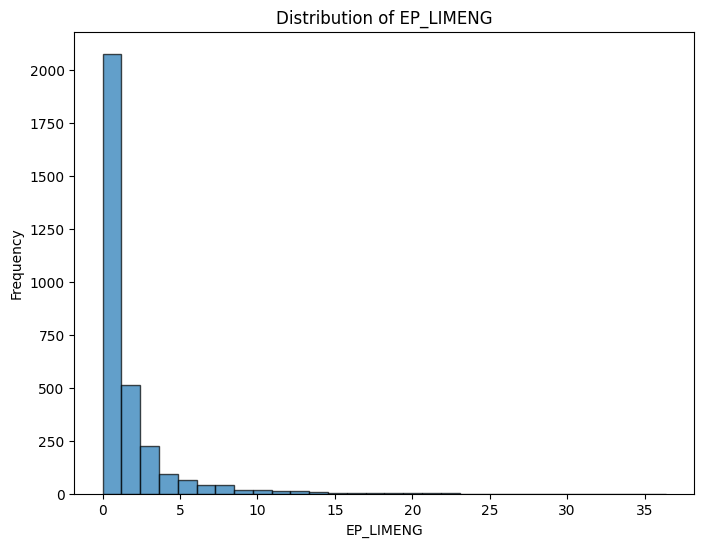

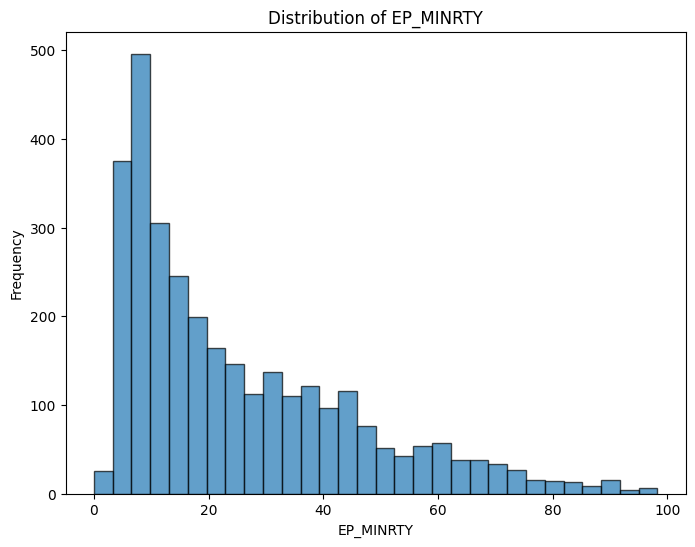

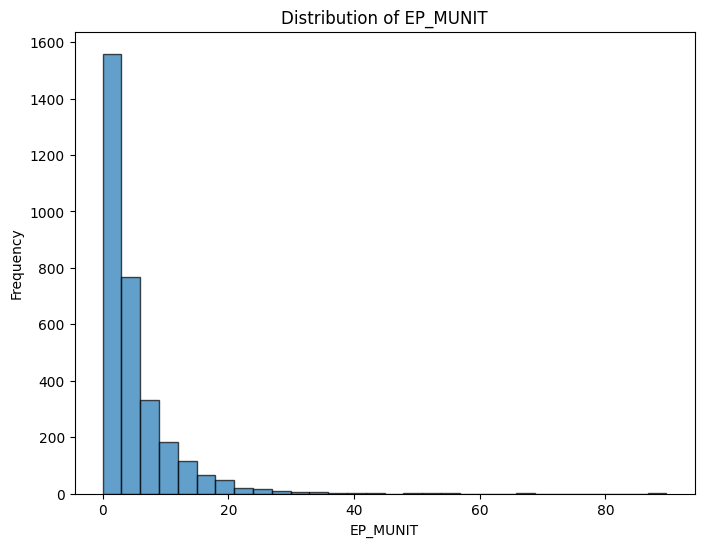

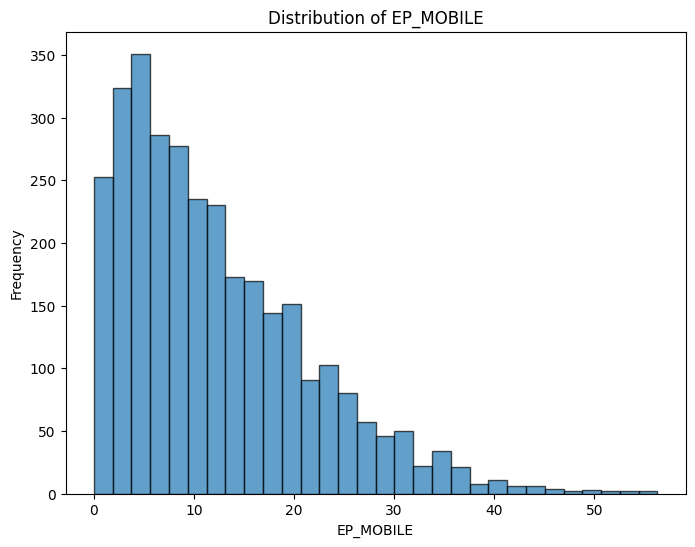

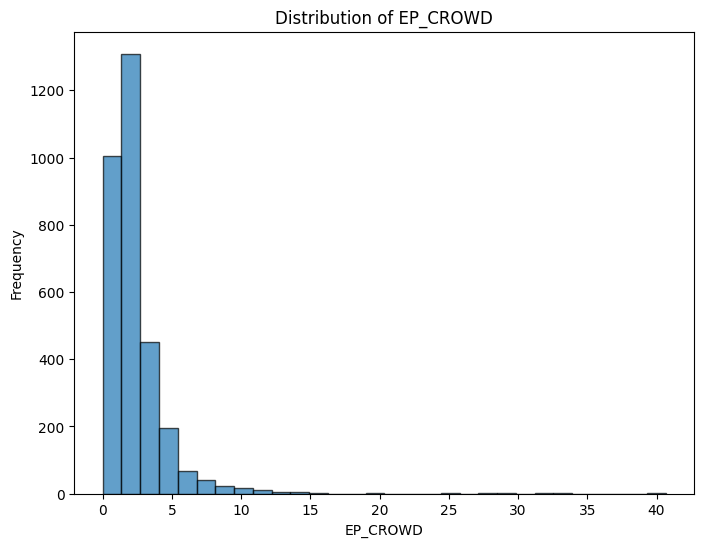

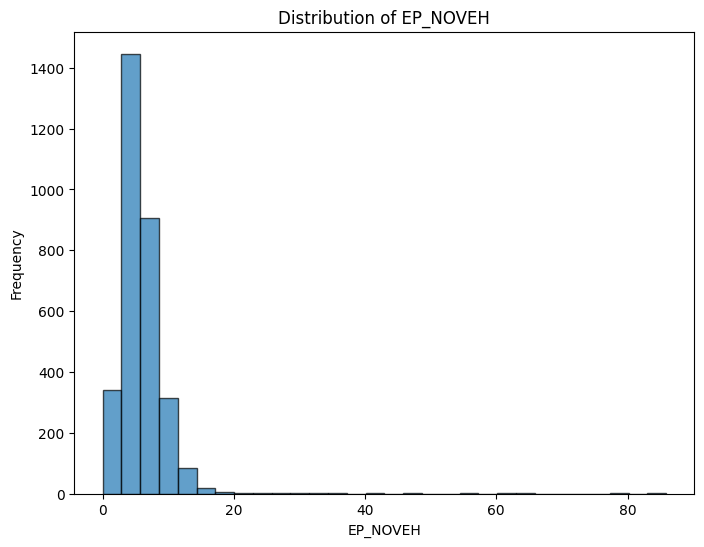

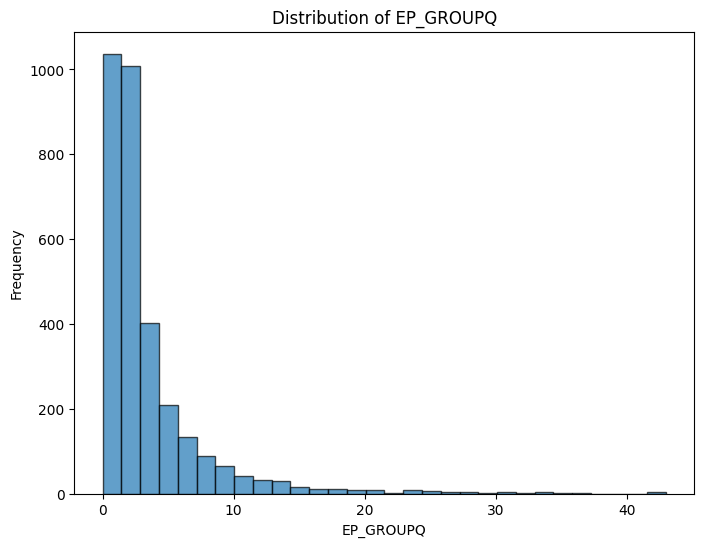

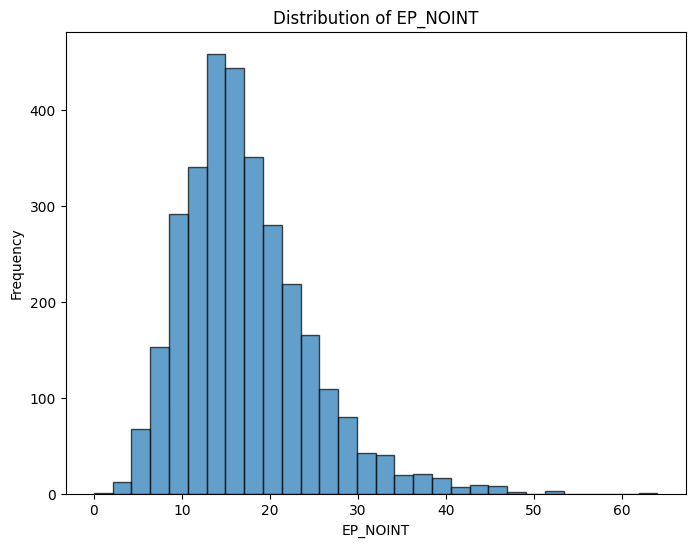

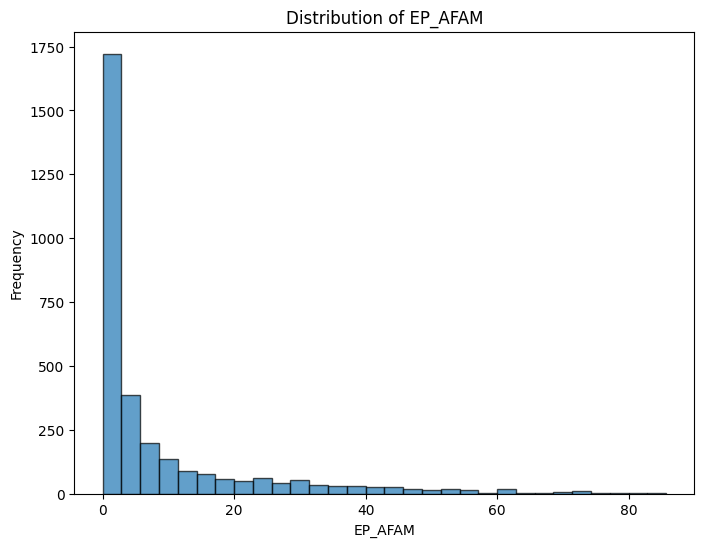

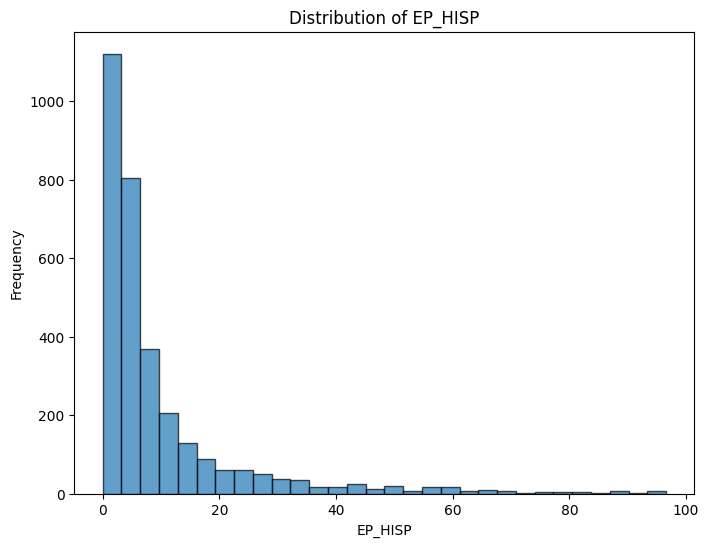

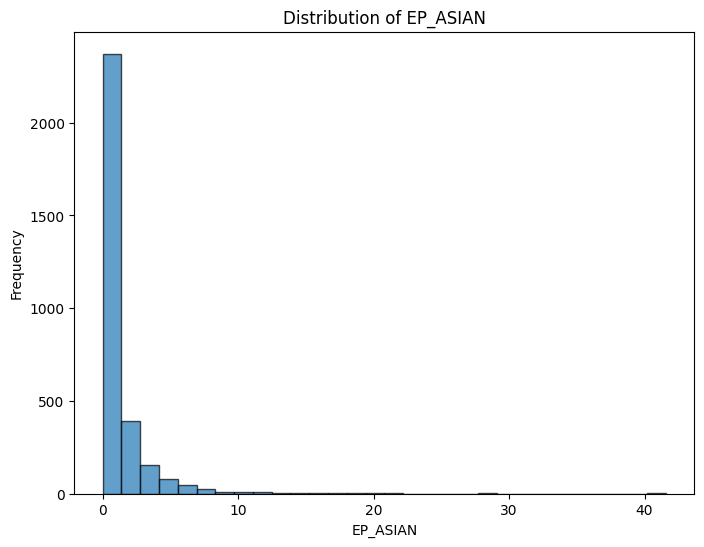

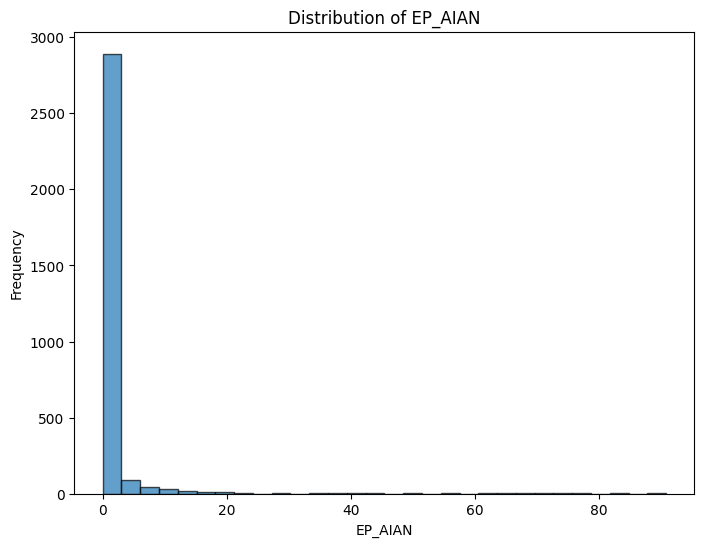

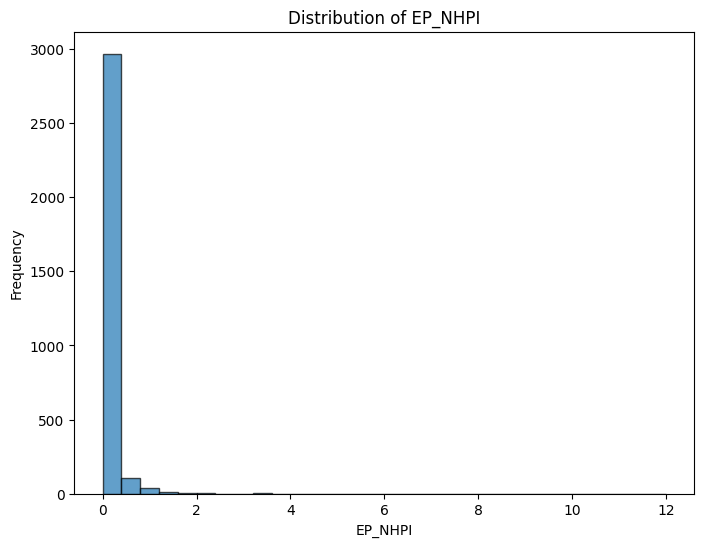

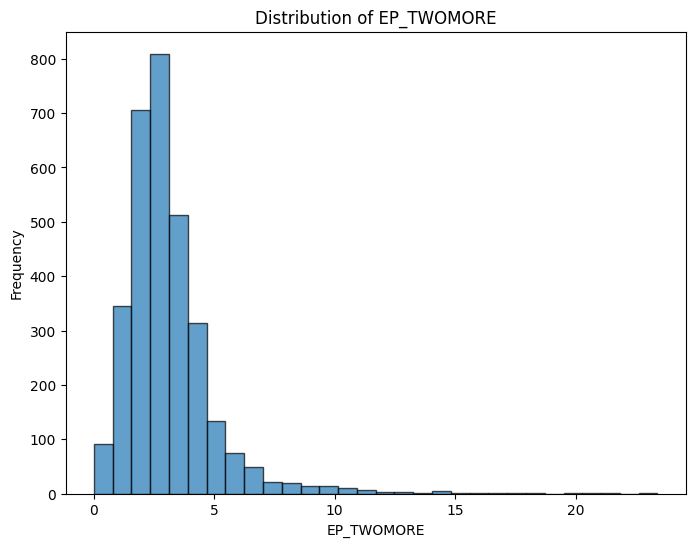

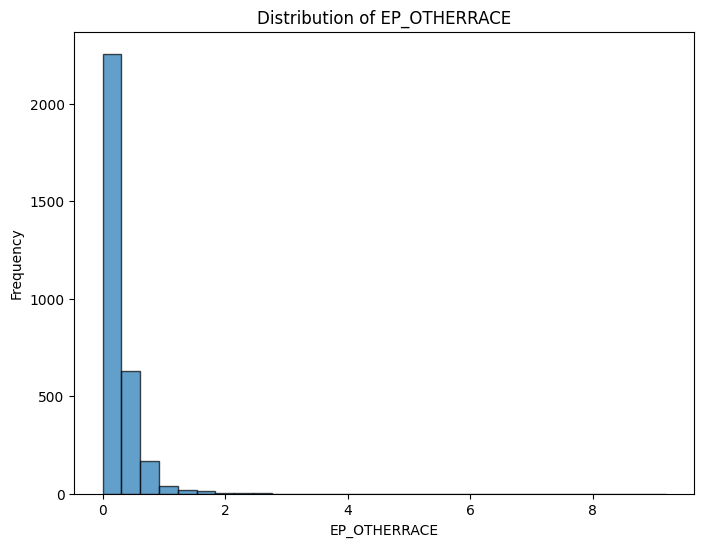

In [11]:
import matplotlib.pyplot as plt

def plot_histogram(column):
    plt.figure(figsize=(8, 6))
    plt.hist(merged_data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

numerical_cols = merged_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plot_histogram(col)

In [12]:
merged_data.to_csv("data/processed/nri_svi_merged.csv")